In [293]:

print('hello world')

hello world


# **Importation des librairies**

In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

# **Importation des bases de données**


In [60]:
df4=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\sous_nutrition.csv")

In [12]:
df1= pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\aide_alimentaire.csv")

In [55]:
df3=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\population.csv")

In [291]:
df2=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\dispo_alimentaire.csv")

# **Etude des pays qui ont eu +/- d'aide alimentaire**

In [40]:


df1.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [13]:
#### regroupement par pays

df1= df1.groupby(['Pays bénéficiaire']).sum()

In [22]:
df1.reset_index(inplace=True)

In [23]:
df1

,Pays bénéficiaire,aide_en_tonne
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
...,...,...
71,Zambie,3026
72,Zimbabwe,62570
73,Égypte,1122
74,Équateur,1362


In [14]:
#### somme depuis 2013, du coups on supprime la colonne.


del df1['Année']

In [24]:
df1

,Pays bénéficiaire,aide_en_tonne
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
...,...,...
71,Zambie,3026
72,Zimbabwe,62570
73,Égypte,1122
74,Équateur,1362


In [15]:
#### rename de la colonne 'Valeur' en 'aide_en_tonne' 


df1.rename(columns={'Valeur': 'aide_en_tonne'}, inplace=True) 


In [304]:
df1

,aide_en_tonne
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666
...,...
Zambie,3026
Zimbabwe,62570
Égypte,1122


### Pays dont l'aide alimentaire est la moins élevé. 

In [25]:
## triage par ordre croissant

df1_a=df1.sort_values(by='aide_en_tonne').head(10)


In [30]:
df1_a

,Pays bénéficiaire,aide_en_tonne
5,Bolivie (État plurinational de),6
24,Géorgie,70
67,Timor-Leste,116
69,Vanuatu,802
73,Égypte,1122
11,"Chine, continentale",1298
74,Équateur,1362
57,Sao Tomé-et-Principe,1826
65,Tadjikistan,2028
4,Bhoutan,2666


### **Représentation graphique (croissant)**


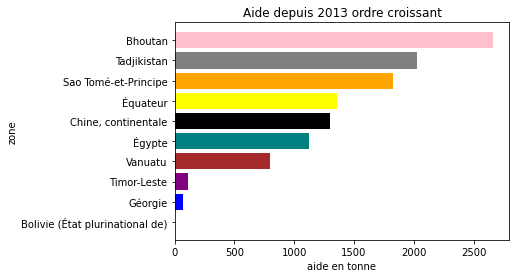

In [98]:

New_Colors = ['green','blue','purple','brown','teal','black','yellow','orange','grey','pink']

plt.barh(df1_a["Pays bénéficiaire"],df1_a["aide_en_tonne"],color=New_Colors)

plt.title('Aide depuis 2013 ordre croissant')
plt.xlabel('aide en tonne')
plt.ylabel('zone')
plt.show()




### Pays dont l'aide alimentaire est la plus élevé. 

In [48]:
## triage par ordre decroissant

df1=df1.sort_values(by='aide_en_tonne', ascending=False).head(10)


In [49]:
df1

,Pays bénéficiaire,aide_en_tonne
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


### **Représentation graphique (decroissant)**







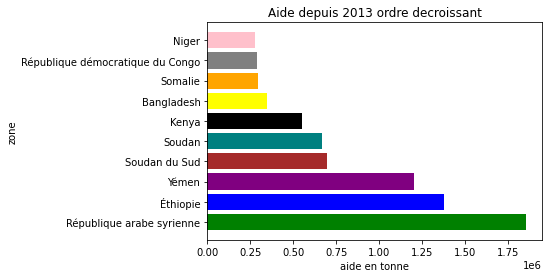

In [50]:

New_Colors = ['green','blue','purple','brown','teal','black','yellow','orange','grey','pink']

plt.barh(df1["Pays bénéficiaire"],df1["aide_en_tonne"],color=New_Colors)

plt.title('Aide depuis 2013 ordre decroissant')
plt.xlabel('aide en tonne')
plt.ylabel('zone')
plt.show()







# Etude de la proportion de sous-nutrition dans les pays


In [56]:
## renomage 

df3.rename(columns={'Valeur': 'pop'}, inplace=True) 

In [57]:
## filatrage

df3_2017=df3['Année']==2017

In [58]:
df3_2017=df3[df3_2017]

In [356]:
df3_2017

,Zone,Année,pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [62]:
## NaN par 0 dans la colonne Valeur

df4.fillna(value={"Valeur": 0}, inplace=True)


In [63]:
df4.rename(columns={'Valeur': 'pop_ss_nut'}, inplace=True) 


In [64]:
df4_2017=df4['Année']=='2016-2018'

In [65]:
df4_2017=df4[df4_2017]

In [361]:
df4_2017

,Zone,Année,pop_ss_nut
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,0
...,...,...,...
1192,Venezuela (République bolivarienne du),2016-2018,8
1198,Viet Nam,2016-2018,6.5
1204,Yémen,2016-2018,0
1210,Zambie,2016-2018,0


In [66]:
############# remplace par 2017 pour une meilleur lecture


df4_2017=df4_2017.replace('2016-2018', 2017)


In [363]:
df4_2017

,Zone,Année,pop_ss_nut
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8
1198,Viet Nam,2017,6.5
1204,Yémen,2017,0
1210,Zambie,2017,0


In [364]:
df3_2017

,Zone,Année,pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [67]:
### jointure


df_joint = pd.merge(df4_2017, df3_2017, left_on="Zone", right_on="Zone")

In [68]:
#### on suprime les colonnes inutiles

del df_joint['Année_x']

In [367]:
del df_joint['Année_y']

In [69]:
df_joint.head(20)

,Zone,pop_ss_nut,Année_y,pop
0,Afghanistan,10.5,2017,36296.113
1,Afrique du Sud,3.1,2017,57009.756
2,Albanie,0.1,2017,2884.169
3,Algérie,1.3,2017,41389.189
4,Allemagne,0,2017,82658.409
5,Andorre,0,2017,77.001
6,Angola,5.8,2017,29816.766
7,Antigua-et-Barbuda,0,2017,95.426
8,Arabie saoudite,1.6,2017,33101.179
9,Argentine,1.5,2017,43937.140


In [70]:
### netoyage

df_joint=df_joint.replace('<0.1', 0)


In [71]:
df_joint.head(20)

,Zone,pop_ss_nut,Année_y,pop
0,Afghanistan,10.5,2017,36296.113
1,Afrique du Sud,3.1,2017,57009.756
2,Albanie,0.1,2017,2884.169
3,Algérie,1.3,2017,41389.189
4,Allemagne,0,2017,82658.409
5,Andorre,0,2017,77.001
6,Angola,5.8,2017,29816.766
7,Antigua-et-Barbuda,0,2017,95.426
8,Arabie saoudite,1.6,2017,33101.179
9,Argentine,1.5,2017,43937.140


In [72]:
c=df_joint['pop_ss_nut']

In [73]:
##  Conversion


pop_ss_nut_float=pd.to_numeric(c, downcast="float")


In [74]:
df_joint['pop_ss_nut_float']=pop_ss_nut_float

In [75]:
df_joint

,Zone,pop_ss_nut,Année_y,pop,pop_ss_nut_float
0,Afghanistan,10.5,2017,36296.113,10.5
1,Afrique du Sud,3.1,2017,57009.756,3.1
2,Albanie,0.1,2017,2884.169,0.1
3,Algérie,1.3,2017,41389.189,1.3
4,Allemagne,0,2017,82658.409,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),8,2017,29402.484,8.0
199,Viet Nam,6.5,2017,94600.648,6.5
200,Yémen,0,2017,27834.819,0.0
201,Zambie,0,2017,16853.599,0.0


In [76]:
del df_joint['pop_ss_nut']

In [77]:
df_joint

,Zone,Année_y,pop,pop_ss_nut_float
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,0.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,8.0
199,Viet Nam,2017,94600.648,6.5
200,Yémen,2017,27834.819,0.0
201,Zambie,2017,16853.599,0.0


In [78]:
### création de la collone 'proportion en sous nutrition'


df_joint['proportion_ss_nut']=round(((df_joint['pop_ss_nut_float']*1000000)*100)/(df_joint['pop']*1000),1)




In [79]:
df_joint

,Zone,Année_y,pop,pop_ss_nut_float,proportion_ss_nut
0,Afghanistan,2017,36296.113,10.5,28.9
1,Afrique du Sud,2017,57009.756,3.1,5.4
2,Albanie,2017,2884.169,0.1,3.5
3,Algérie,2017,41389.189,1.3,3.1
4,Allemagne,2017,82658.409,0.0,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,8.0,27.2
199,Viet Nam,2017,94600.648,6.5,6.9
200,Yémen,2017,27834.819,0.0,0.0
201,Zambie,2017,16853.599,0.0,0.0


### Pays dont la proportion de sous-nutrition est la plus élevé.

In [80]:

dfv1=df_joint.sort_values(by='proportion_ss_nut', ascending=False).head(10)


In [81]:
dfv1

,Zone,Année_y,pop,pop_ss_nut_float,proportion_ss_nut
78,Haïti,2017,10982.366,5.3,48.3
157,République populaire démocratique de Corée,2017,25429.825,12.0,47.2
108,Madagascar,2017,25570.512,10.5,41.1
103,Libéria,2017,4702.226,1.8,38.3
100,Lesotho,2017,2091.534,0.8,38.2
183,Tchad,2017,15016.753,5.7,38.0
161,Rwanda,2017,11980.961,4.2,35.1
121,Mozambique,2017,28649.018,9.4,32.8
186,Timor-Leste,2017,1243.258,0.4,32.2
0,Afghanistan,2017,36296.113,10.5,28.9


### Représentation graphique avec matplotlib

In [88]:
dfv1['Zone'].unique()




array(['Haïti', 'République populaire démocratique de Corée',
       'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda',
       'Mozambique', 'Timor-Leste', 'Afghanistan'], dtype=object)

In [89]:
dfv1['proportion_ss_nut'].unique()

array([48.3, 47.2, 41.1, 38.3, 38.2, 38. , 35.1, 32.8, 32.2, 28.9])

In [82]:
import matplotlib.patches as mpatches


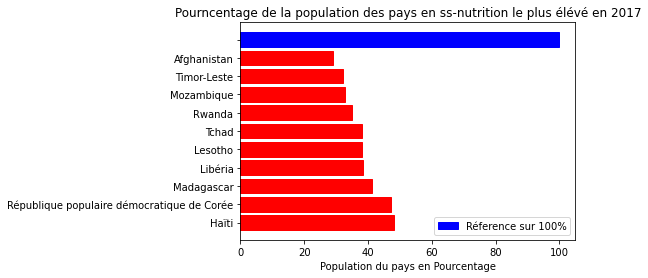

In [95]:
# méthode avec unique() pour utilisé la bare de réference 100%


names=['Haïti', 'République populaire démocratique de Corée','Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda','Mozambique', 'Timor-Leste', 'Afghanistan',''] 


values= [48.3, 47.2, 41.1, 38.3, 38.2, 38. , 35.1, 32.8, 32.2, 28.9,100]

plt.title('Pourncentage de la population des pays en ss-nutrition le plus élévé en 2017' )
plt.xlabel('Population du pays en Pourcentage')


plt.barh(names, values)
X=plt.barh(names, values)
plt.legend('best')

red_patch = mpatches.Patch(color='b', label='Réference sur 100%')
plt.legend(handles=[red_patch])

X[0].set_color('r')
X[1].set_color('r')
X[2].set_color('r')
X[3].set_color('r')
X[4].set_color('r')
X[5].set_color('r')
X[6].set_color('r')
X[7].set_color('r')
X[8].set_color('r')
X[9].set_color('r')
X[10].set_color('b')




plt.show()



In [380]:
### supression des zeros 


a=df_joint['pop_ss_nut_float'] != 0


In [382]:
df_jointt=df_joint[a]

### Pays dont la proportion de sous-nutrition est la moins élevé. 


In [479]:

dfv2=df_jointt.sort_values(by='proportion_ss_nut', ascending=True ).head(10)


In [480]:
dfv2

,Zone,pop,pop_ss_nut_float,proportion_ss_nut
29,Bulgarie,7102.444,0.2,2.8
135,Ouzbékistan,31959.785,0.9,2.8
3,Algérie,41389.189,1.3,3.1
109,Malaisie,31104.646,1.0,3.2
36,Chili,18470.439,0.6,3.2
54,Émirats arabes unis,9487.203,0.3,3.2
9,Argentine,43937.140,1.5,3.4
195,Ukraine,44487.709,1.5,3.4
192,Turkménistan,5757.667,0.2,3.5
2,Albanie,2884.169,0.1,3.5


### Représentation graphique avec matplolib



In [501]:
df2_essai=dfv2['proportion_ss_nut']

In [509]:
df2_essai.tolist()

[2.8, 2.8, 3.1, 3.2, 3.2, 3.2, 3.4, 3.4, 3.5, 3.5]

In [510]:
dfv2['Zone'].tolist()

['Bulgarie',
 'Ouzbékistan',
 'Algérie',
 'Malaisie',
 'Chili',
 'Émirats arabes unis',
 'Argentine',
 'Ukraine',
 'Turkménistan',
 'Albanie']

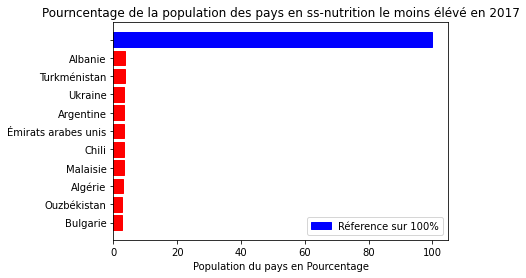

In [94]:


names2=['Bulgarie', 'Ouzbékistan','Algérie', 'Malaisie','Chili','Émirats arabes unis','Argentine','Ukraine','Turkménistan','Albanie',''] 


values2= [2.8, 2.8, 3.1, 3.2, 3.2, 3.2, 3.4, 3.4, 3.5, 3.5, 100]

plt.title('Pourncentage de la population des pays en ss-nutrition le moins élévé en 2017' )
plt.xlabel('Population du pays en Pourcentage')


plt.barh(names2, values2)
X=plt.barh(names2, values2)
plt.legend('best')

red_patch = mpatches.Patch(color='b', label='Réference sur 100%')
plt.legend(handles=[red_patch])


# utilisation d'une autre façon de mettre en couleur
X[0].set_color('r')
X[1].set_color('r')
X[2].set_color('r')
X[3].set_color('r')
X[4].set_color('r')
X[5].set_color('r')
X[6].set_color('r')
X[7].set_color('r')
X[8].set_color('r')
X[9].set_color('r')
X[10].set_color('b')


plt.show()


In [292]:
###### renome de la colonne.


df2.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire'}, inplace=True) 


In [293]:
##### Selection des colonnes utiles


df2=df2[['Zone','Disponibilité alimentaire']]

In [294]:
df2

,Zone,Disponibilité alimentaire
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
...,...,...
15600,Îles Salomon,45.0
15601,Îles Salomon,11.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [295]:
df2=df2.groupby(['Zone']).sum()

In [296]:
df2

,Disponibilité alimentaire
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [297]:
df3_2017

,Zone,Année,pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [298]:
df_joint2 = pd.merge(df3_2017, df2, left_on="Zone", right_on="Zone")

In [299]:
df_joint2

,Zone,Année,pop,Disponibilité alimentaire
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2633.0
168,Viet Nam,2017,94600.648,2744.0
169,Yémen,2017,27834.819,2217.0
170,Zambie,2017,16853.599,1924.0


In [300]:
df_joint2['disponibilité alimentaire en cal/pop']=(df_joint2['pop']*1000)*(df_joint2['Disponibilité alimentaire'])

In [301]:
df_joint2

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10
1,Afrique du Sud,2017,57009.756,3020.0,1.721695e+11
2,Albanie,2017,2884.169,3188.0,9.194731e+09
3,Algérie,2017,41389.189,3293.0,1.362946e+11
4,Allemagne,2017,82658.409,3503.0,2.895524e+11
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2633.0,7.741674e+10
168,Viet Nam,2017,94600.648,2744.0,2.595842e+11
169,Yémen,2017,27834.819,2217.0,6.170979e+10
170,Zambie,2017,16853.599,1924.0,3.242632e+10


In [302]:
#########" disponibilité alimentaire ordre decroissant"




df_joint2.sort_values(by='Disponibilité alimentaire', ascending=True ).head(10)



,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop
131,République centrafricaine,2017,4596.023,1879.0,8.635927e+09
170,Zambie,2017,16853.599,1924.0,3.242632e+10
97,Madagascar,2017,25570.512,2056.0,5.257297e+10
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10
70,Haïti,2017,10982.366,2089.0,2.294216e+10
136,République populaire démocratique de Corée,2017,25429.825,2093.0,5.322462e+10
156,Tchad,2017,15016.753,2109.0,3.167033e+10
171,Zimbabwe,2017,14236.595,2113.0,3.008193e+10
120,Ouganda,2017,41166.588,2126.0,8.752017e+10
55,Éthiopie,2017,106399.924,2129.0,2.265254e+11


In [303]:
#########" disponibilité alimentaire ordre croissant"


df_joint2.sort_values(by='Disponibilité alimentaire',ascending=False ).head(10)




,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop
11,Autriche,2017,8819.901,3770.0,3.325103e+10
17,Belgique,2017,11419.748,3737.0,4.267560e+10
163,Turquie,2017,81116.450,3708.0,3.007798e+11
54,États-Unis d'Amérique,2017,325084.756,3682.0,1.196962e+12
80,Israël,2017,8243.848,3610.0,2.976029e+10
78,Irlande,2017,4753.279,3602.0,1.712131e+10
81,Italie,2017,60673.701,3578.0,2.170905e+11
95,Luxembourg,2017,591.910,3540.0,2.095361e+09
47,Égypte,2017,96442.591,3518.0,3.392850e+11
4,Allemagne,2017,82658.409,3503.0,2.895524e+11


In [304]:
df_joint2['nombre_pers_pvt_nourrie']=((df_joint2['disponibilité alimentaire en cal/pop'])/2500)

In [307]:
df_joint2.head(10)

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10,3.030000e+07
1,Afrique du Sud,2017,57009.756,3020.0,1.721695e+11,6.886779e+07
2,Albanie,2017,2884.169,3188.0,9.194731e+09,3.677892e+06
3,Algérie,2017,41389.189,3293.0,1.362946e+11,5.451784e+07
4,Allemagne,2017,82658.409,3503.0,2.895524e+11,1.158210e+08
5,Angola,2017,29816.766,2474.0,7.376668e+10,2.950667e+07
6,Antigua-et-Barbuda,2017,95.426,2416.0,2.305492e+08,9.221969e+04
7,Arabie saoudite,2017,33101.179,3255.0,1.077443e+11,4.309774e+07
8,Argentine,2017,43937.140,3226.0,1.417412e+11,5.669649e+07
9,Arménie,2017,2944.791,2924.0,8.610569e+09,3.444228e+06


In [308]:
#### personne pouvant être nourrie mondialement

df_joint2['nombre_pers_pvt_nourrie'].sum()

8367593850.9324

In [309]:
df_joint2['proportion']=((df_joint2['nombre_pers_pvt_nourrie']*100)/(df_joint2['pop']*1000))

In [310]:
#### propotions des pays qui peuvent se nourir graçe à leur disponibilité alimentaire

df_joint2

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie,proportion
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10,3.030000e+07,83.48
1,Afrique du Sud,2017,57009.756,3020.0,1.721695e+11,6.886779e+07,120.80
2,Albanie,2017,2884.169,3188.0,9.194731e+09,3.677892e+06,127.52
3,Algérie,2017,41389.189,3293.0,1.362946e+11,5.451784e+07,131.72
4,Allemagne,2017,82658.409,3503.0,2.895524e+11,1.158210e+08,140.12
...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2633.0,7.741674e+10,3.096670e+07,105.32
168,Viet Nam,2017,94600.648,2744.0,2.595842e+11,1.038337e+08,109.76
169,Yémen,2017,27834.819,2217.0,6.170979e+10,2.468392e+07,88.68
170,Zambie,2017,16853.599,1924.0,3.242632e+10,1.297053e+07,76.96


In [ ]:
################ proportion des pays qui peuvent le plus se nourir en fonction de la disponibilité alimentaire.




### **Pays dont la proportion de la disponibillité alimentaire en fonction de la popualtion est le plus élevé**

In [311]:
############# Odre decroissant

df_joint3=df_joint2.sort_values(by='proportion', ascending=False).head(10)


In [312]:
df_joint3

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie,proportion
11,Autriche,2017,8819.901,3770.0,3.325103e+10,1.330041e+07,150.80
17,Belgique,2017,11419.748,3737.0,4.267560e+10,1.707024e+07,149.48
163,Turquie,2017,81116.450,3708.0,3.007798e+11,1.203119e+08,148.32
54,États-Unis d'Amérique,2017,325084.756,3682.0,1.196962e+12,4.787848e+08,147.28
80,Israël,2017,8243.848,3610.0,2.976029e+10,1.190412e+07,144.40
78,Irlande,2017,4753.279,3602.0,1.712131e+10,6.848524e+06,144.08
81,Italie,2017,60673.701,3578.0,2.170905e+11,8.683620e+07,143.12
95,Luxembourg,2017,591.910,3540.0,2.095361e+09,8.381446e+05,141.60
47,Égypte,2017,96442.591,3518.0,3.392850e+11,1.357140e+08,140.72
4,Allemagne,2017,82658.409,3503.0,2.895524e+11,1.158210e+08,140.12


### **Représentation graphique**

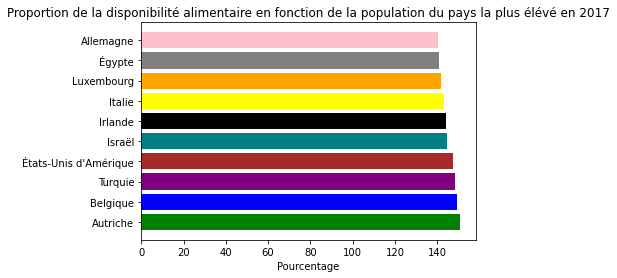

In [271]:
New_Colors = ['green','blue','purple','brown','teal','black','yellow','orange','grey','pink']

plt.barh(df_joint3["Zone"],df_joint3["proportion"],color=New_Colors)

plt.title('Proportion de la disponibilité alimentaire en fonction de la population du pays la plus élévé en 2017')
plt.xlabel('Pourcentage')
plt.ylabel
plt.show()








### **Pays dont la proportion de la disponibillité alimentaire en fonction de la popualtion est le moins élevé**

In [315]:
################### ordre croissant des pays qui peuvent le moins se nourrir.

Pays_pauvre=df_joint2.sort_values(by='proportion').head(10)


In [316]:
Pays_pauvre

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie,proportion
131,République centrafricaine,2017,4596.023,1879.0,8.635927e+09,3.454371e+06,75.16
170,Zambie,2017,16853.599,1924.0,3.242632e+10,1.297053e+07,76.96
97,Madagascar,2017,25570.512,2056.0,5.257297e+10,2.102919e+07,82.24
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10,3.030000e+07,83.48
70,Haïti,2017,10982.366,2089.0,2.294216e+10,9.176865e+06,83.56
136,République populaire démocratique de Corée,2017,25429.825,2093.0,5.322462e+10,2.128985e+07,83.72
156,Tchad,2017,15016.753,2109.0,3.167033e+10,1.266813e+07,84.36
171,Zimbabwe,2017,14236.595,2113.0,3.008193e+10,1.203277e+07,84.52
120,Ouganda,2017,41166.588,2126.0,8.752017e+10,3.500807e+07,85.04
158,Timor-Leste,2017,1243.258,2129.0,2.646896e+09,1.058759e+06,85.16


### **Représentation graphique**

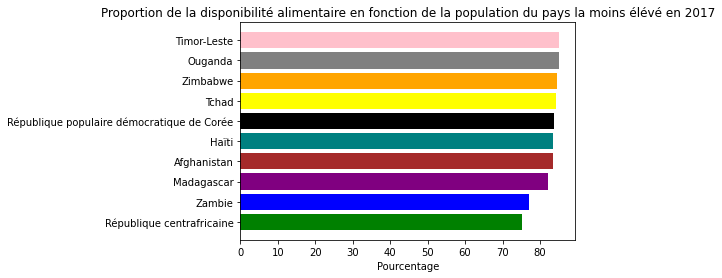

In [317]:

New_Colors = ['green','blue','purple','brown','teal','black','yellow','orange','grey','pink']

plt.barh(Pays_pauvre["Zone"],Pays_pauvre["proportion"],color=New_Colors)

plt.title('Proportion de la disponibilité alimentaire en fonction de la population du pays la moins élévé en 2017')
plt.xlabel('Pourcentage')
plt.show()










In [ ]:






####### proportion la plus basse / pays les plus touché en pop.

In [336]:
catastrophe=df_joint2.sort_values(by="proportion", ascending=True).head(20)


In [337]:
catastrophe

,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie,proportion
131,République centrafricaine,2017,4596.023,1879.0,8.635927e+09,3.454371e+06,75.16
170,Zambie,2017,16853.599,1924.0,3.242632e+10,1.297053e+07,76.96
97,Madagascar,2017,25570.512,2056.0,5.257297e+10,2.102919e+07,82.24
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10,3.030000e+07,83.48
70,Haïti,2017,10982.366,2089.0,2.294216e+10,9.176865e+06,83.56
136,République populaire démocratique de Corée,2017,25429.825,2093.0,5.322462e+10,2.128985e+07,83.72
156,Tchad,2017,15016.753,2109.0,3.167033e+10,1.266813e+07,84.36
171,Zimbabwe,2017,14236.595,2113.0,3.008193e+10,1.203277e+07,84.52
120,Ouganda,2017,41166.588,2126.0,8.752017e+10,3.500807e+07,85.04
158,Timor-Leste,2017,1243.258,2129.0,2.646896e+09,1.058759e+06,85.16


In [339]:
catastrophe.sort_values(['pop'],ascending=False).head(10)


,Zone,Année,pop,Disponibilité alimentaire,disponibilité alimentaire en cal/pop,nombre_pers_pvt_nourrie,proportion
55,Éthiopie,2017,106399.924,2129.0,2.265254e+11,9.061018e+07,85.16
137,République-Unie de Tanzanie,2017,54660.339,2204.0,1.204714e+11,4.818855e+07,88.16
86,Kenya,2017,50221.142,2205.0,1.107376e+11,4.429505e+07,88.20
120,Ouganda,2017,41166.588,2126.0,8.752017e+10,3.500807e+07,85.04
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10,3.030000e+07,83.48
169,Yémen,2017,27834.819,2217.0,6.170979e+10,2.468392e+07,88.68
97,Madagascar,2017,25570.512,2056.0,5.257297e+10,2.102919e+07,82.24
136,République populaire démocratique de Corée,2017,25429.825,2093.0,5.322462e+10,2.128985e+07,83.72
170,Zambie,2017,16853.599,1924.0,3.242632e+10,1.297053e+07,76.96
156,Tchad,2017,15016.753,2109.0,3.167033e+10,1.266813e+07,84.36


In [ ]:
### on voit clairement que l'Ethiopie est le plus grandement touché en rapport avec le nombre de sa population et sa proportion basse